In [64]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation, UpSampling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras import Input, Model

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Hyper parameter tuning
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
import numpy as np

In [37]:
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [38]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [39]:
%matplotlib inline 
image_index = 2603
print(y_train[image_index])

3


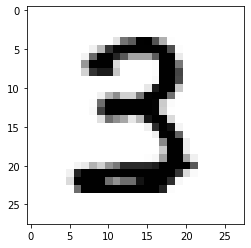

In [40]:
plt.imshow(x_train[image_index], cmap='Greys')

In [41]:
x_train.shape

(60000, 28, 28)

In [42]:
#Adding random noise to the images
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

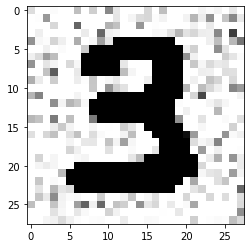

In [43]:
plt.imshow(x_train_noisy[image_index], cmap='Greys')

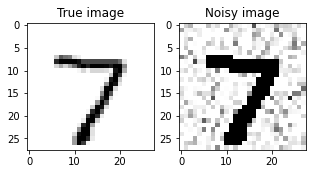

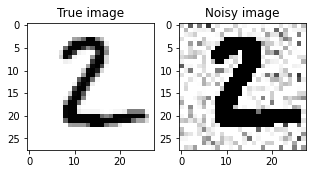

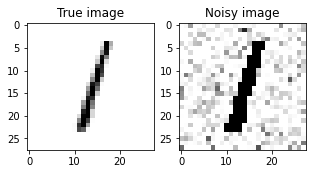

In [44]:
n = 3
for i in range(n):
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(5, 5)
    axes[0].set_title('True image')
    im0 = axes[0].imshow(x_test[i], cmap='Greys')
    axes[1].set_title('Noisy image')
    im1 = axes[1].imshow(x_test_noisy[i], cmap='Greys')

In [45]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train_noisy = x_train_noisy.reshape(x_train_noisy.shape[0], 28, 28, 1)
x_test_noisy = x_test_noisy.reshape(x_test_noisy.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train_noisy = x_train_noisy.astype('float32')
x_test_noisy = x_test_noisy.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train_noisy /= 255
x_test_noisy /= 255
print('x_train shape:', x_train_noisy.shape)
print('Number of images in x_train', x_train_noisy.shape[0])
print('Number of images in x_test', x_test_noisy.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [46]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [47]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train_noisy,y=y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 341us/sample - loss: 0.6062 - accuracy: 0.8141
Epoch 2/10
60000/60000 [==============================] - 19s 321us/sample - loss: 0.2572 - accuracy: 0.9221
Epoch 3/10
60000/60000 [==============================] - 20s 327us/sample - loss: 0.1981 - accuracy: 0.9396
Epoch 4/10
60000/60000 [==============================] - 20s 341us/sample - loss: 0.1674 - accuracy: 0.9495
Epoch 5/10
60000/60000 [==============================] - 20s 333us/sample - loss: 0.1449 - accuracy: 0.9556
Epoch 6/10
60000/60000 [==============================] - 20s 341us/sample - loss: 0.1324 - accuracy: 0.9587
Epoch 7/10
60000/60000 [==============================] - 20s 330us/sample - loss: 0.1227 - accuracy: 0.9617
Epoch 8/10
60000/60000 [==============================] - 21s 352us/sample - loss: 0.1124 - accuracy: 0.9643
Epoch 9/10
60000/60000 [==============================] - 21s 352us/sample - loss: 0.1061 - accuracy: 0.9

In [48]:
model.evaluate(x_test_noisy, y_test)

10000/10000 [==============================] - 1s 111us/sample - loss: 0.0948 - accuracy: 0.9723


[0.09483825556538068, 0.9723]

9


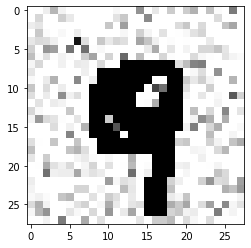

In [49]:
image_index = 4444
plt.imshow(x_test_noisy[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test_noisy[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [50]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.154067660224244))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.154067660224244))
model.add(Dense(10,activation=tf.nn.softmax))
optim = Adam(lr=10**-3)
model.compile(optimizer=optim, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train_noisy,y=y_train, epochs=10, validation_data=(x_test_noisy, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 299us/sample - loss: 0.7520 - accuracy: 0.7462 - val_loss: 0.2601 - val_accuracy: 0.9171
Epoch 2/10
60000/60000 [==============================] - 17s 283us/sample - loss: 0.2686 - accuracy: 0.9176 - val_loss: 0.1722 - val_accuracy: 0.9464
Epoch 3/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.2037 - accuracy: 0.9376 - val_loss: 0.1365 - val_accuracy: 0.9578
Epoch 4/10
60000/60000 [==============================] - 17s 281us/sample - loss: 0.1704 - accuracy: 0.9480 - val_loss: 0.1230 - val_accuracy: 0.9612
Epoch 5/10
60000/60000 [==============================] - 17s 291us/sample - loss: 0.1490 - accuracy: 0.9541 - val_loss: 0.1095 - val_accuracy: 0.9639
Epoch 6/10
60000/60000 [==============================] - 17s 289us/sample - loss: 0.1329 - accuracy: 0.9585 - val_loss: 0.1067 - val_accuracy: 0.9663
Epoch 7/10
60000/60000 [====================

In [51]:
model.evaluate(x_test_noisy, y_test)

10000/10000 [==============================] - 1s 128us/sample - loss: 0.0844 - accuracy: 0.9731


[0.0844362546232529, 0.9731]

0


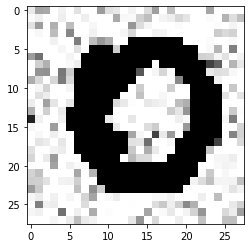

In [52]:
image_index = 4444
plt.imshow(x_train_noisy[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_train_noisy[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [82]:
def data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    noise_factor = 0.3
    x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape) 
    x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

    x_train_noisy = np.clip(x_train_noisy, 0., 1.)
    x_test_noisy = np.clip(x_test_noisy, 0., 1.)
    
    x_train_noisy = x_train_noisy.reshape(x_train_noisy.shape[0], 28, 28, 1)
    x_test_noisy = x_test_noisy.reshape(x_test_noisy.shape[0], 28, 28, 1)
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    # Making sure that the values are float so that we can get decimal points after division
    x_train_noisy = x_train_noisy.astype('float32')
    x_test_noisy = x_test_noisy.astype('float32')
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    # Normalizing the RGB codes by dividing it to the max RGB value.
    x_train_noisy /= 255
    x_test_noisy /= 255
    x_train /= 255
    x_test /= 255
    input_shape = (28, 28, 1)
    return x_train_noisy, y_train, x_test_noisy, y_test, input_shape, x_train, x_test

In [83]:
x_train_noisy, y_train, x_test_noisy, y_test, input_shape, x_train, x_test = data()


Encoder

In [86]:
input_img = Input(shape = input_shape)

In [87]:
x = Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding = 'same')(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding = 'same')(x)

Decorder

In [88]:
x = Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D(size = (2, 2))(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D(size = (2, 2))(x)
decoded = Conv2D(filters = 1, kernel_size = (3, 3), activation = 'sigmoid', padding = 'same')(x)

Autoencoder

In [89]:
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 32)        0   

In [90]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [91]:
validation_split = 0.3
history = autoencoder.fit(x_train_noisy, x_train, epochs = 40, batch_size = 1000, shuffle = True, validation_split = validation_split)

Train on 42000 samples, validate on 18000 samples
Epoch 1/40
42000/42000 [==============================] - 87s 2ms/sample - loss: 0.5382 - val_loss: 0.4420
Epoch 2/40
42000/42000 [==============================] - 89s 2ms/sample - loss: 0.3714 - val_loss: 0.2822
Epoch 3/40
42000/42000 [==============================] - 90s 2ms/sample - loss: 0.2772 - val_loss: 0.2710
Epoch 4/40
42000/42000 [==============================] - 93s 2ms/sample - loss: 0.2664 - val_loss: 0.2576
Epoch 5/40
42000/42000 [==============================] - 93s 2ms/sample - loss: 0.2497 - val_loss: 0.2389
Epoch 6/40
42000/42000 [==============================] - 95s 2ms/sample - loss: 0.2250 - val_loss: 0.2121
Epoch 7/40
42000/42000 [==============================] - 94s 2ms/sample - loss: 0.2066 - val_loss: 0.1978
Epoch 8/40
42000/42000 [==============================] - 91s 2ms/sample - loss: 0.1861 - val_loss: 0.1780
Epoch 9/40
42000/42000 [==============================] - 91s 2ms/sample - loss: 0.1687 - val_

Tracking the history of the training stage

In [92]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [93]:
train_loss = history.history['loss']
train_val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

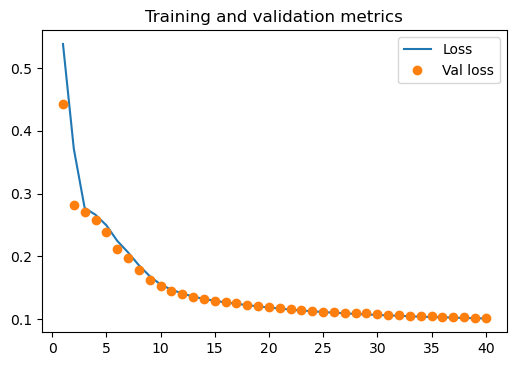

In [94]:
plt.figure(dpi = 100)
plt.plot(epochs, train_loss, label = 'Loss')
plt.plot(epochs, train_val_loss, 'o', label = 'Val loss')
plt.title('Training and validation metrics')
plt.legend()
plt.savefig('history.png')

In [100]:
x_test_denoised = autoencoder.predict(x_test_noisy)

In [101]:
test_loss  = autoencoder.evaluate(x_test_noisy, x_test, batch_size = 1000)
test_loss

10000/10000 [==============================] - 3s 286us/sample - loss: 0.1001


0.1001132033765316

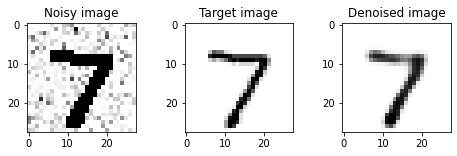

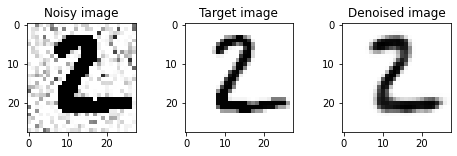

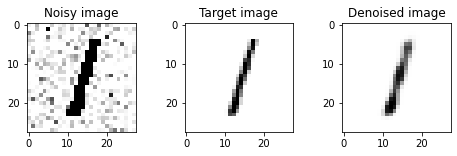

In [102]:
n = 3
for i in range(n):
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(8, 2)
    axes[0].set_title('Noisy image')
    im0 = axes[0].imshow(x_test_noisy[i], cmap = 'Greys')
    axes[1].set_title('Target image')
    im1 = axes[1].imshow(x_test[i], cmap = 'Greys')
    axes[2].set_title('Denoised image')
    im2 = axes[2].imshow(x_test_denoised[i], cmap = 'Greys')
    plt.savefig(f'comparison-{i}.png')

In [103]:
x_train_denoised = autoencoder.predict(x_train_noisy)

In [113]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.05))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.05))
model.add(Dense(10,activation=tf.nn.softmax))
optim = Adam(lr=10**-3)
model.compile(optimizer=optim, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train_denoised,y=y_train, epochs=10, validation_data=(x_test_denoised, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.2523 - accuracy: 0.9220 - val_loss: 0.1280 - val_accuracy: 0.9586
Epoch 2/10
60000/60000 [==============================] - 17s 282us/sample - loss: 0.1227 - accuracy: 0.9607 - val_loss: 0.1079 - val_accuracy: 0.9653
Epoch 3/10
60000/60000 [==============================] - 17s 284us/sample - loss: 0.0988 - accuracy: 0.9683 - val_loss: 0.0912 - val_accuracy: 0.9714
Epoch 4/10
60000/60000 [==============================] - 16s 273us/sample - loss: 0.0824 - accuracy: 0.9733 - val_loss: 0.0863 - val_accuracy: 0.9725
Epoch 5/10
60000/60000 [==============================] - 17s 281us/sample - loss: 0.0689 - accuracy: 0.9773 - val_loss: 0.0965 - val_accuracy: 0.9697
Epoch 6/10
60000/60000 [==============================] - 17s 283us/sample - loss: 0.0605 - accuracy: 0.9797 - val_loss: 0.0876 - val_accuracy: 0.9726
Epoch 7/10
60000/60000 [====================

In [114]:
model.evaluate(x_test_denoised, y_test)

10000/10000 [==============================] - 1s 123us/sample - loss: 0.1067 - accuracy: 0.9718


[0.10667522362975869, 0.9718]

0


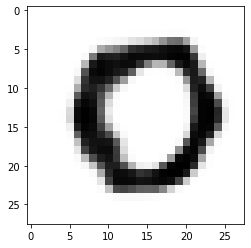

In [115]:
image_index = 4444
plt.imshow(x_train_denoised[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_train_denoised[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [118]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.1))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.1))
model.add(Dense(10,activation=tf.nn.softmax))
optim = Adam(lr=10**-3)
model.compile(optimizer=optim, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train_denoised,y=y_train, epochs=10, validation_data=(x_test_denoised, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 302us/sample - loss: 0.2839 - accuracy: 0.9118 - val_loss: 0.1472 - val_accuracy: 0.9536
Epoch 2/10
60000/60000 [==============================] - 20s 332us/sample - loss: 0.1351 - accuracy: 0.9574 - val_loss: 0.1044 - val_accuracy: 0.9656
Epoch 3/10
60000/60000 [==============================] - 20s 339us/sample - loss: 0.1057 - accuracy: 0.9676 - val_loss: 0.0940 - val_accuracy: 0.9707
Epoch 4/10
60000/60000 [==============================] - 21s 354us/sample - loss: 0.0882 - accuracy: 0.9723 - val_loss: 0.0928 - val_accuracy: 0.9712
Epoch 5/10
60000/60000 [==============================] - 20s 340us/sample - loss: 0.0763 - accuracy: 0.9760 - val_loss: 0.0815 - val_accuracy: 0.9741
Epoch 6/10
60000/60000 [==============================] - 20s 335us/sample - loss: 0.0687 - accuracy: 0.9775 - val_loss: 0.0891 - val_accuracy: 0.9739
Epoch 7/10
60000/60000 [====================

In [119]:
model.evaluate(x_test_denoised, y_test)

10000/10000 [==============================] - 1s 116us/sample - loss: 0.0946 - accuracy: 0.9739


[0.09460322193020257, 0.9739]